# Experiment - 5 (KNNs)

Name: Shantanu Shaji

PRN: 24070126165

---
Title: Implementation of K Nearest Neighbours

Aim:  To apply the K-Nearest Neighbours algorithm on a given dataset for classification.

---

Problem statement:

- To use the given dataset to demonstrate classification using the K-Nearest Neighbours (KNN) algorithm.

Objective:

- To understand the working of the KNN algorithm

- To classify data points based on distance metrics

- To analyze the effect of different values of K

---


## Iris

### Setup

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names )
df['target'] = iris.target  # Add target classes.
df['flower_names'] = df.target.apply(lambda x: iris.target_names[x])   # Name the classes
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
df['flower_names'].value_counts()

,count
flower_names,
setosa,50
versicolor,50
virginica,50


#### Visualizing **Plots**

In [5]:
# Splitting the datasets into their respective targets.
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [6]:
import matplotlib.pyplot as plt

##### Sepal Length vs Sepal Width

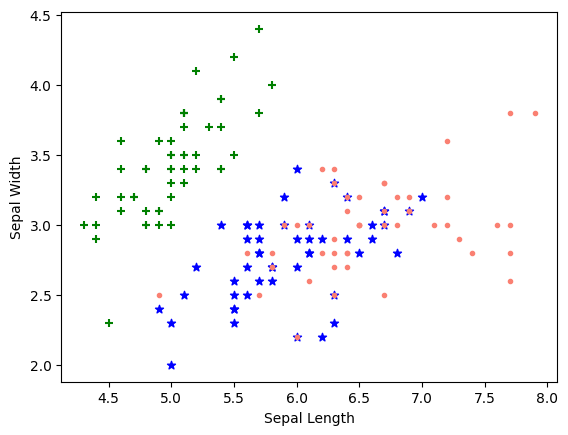

In [7]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='*')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='salmon', marker='.')
plt.show()


##### Petal Length vs Petal Width

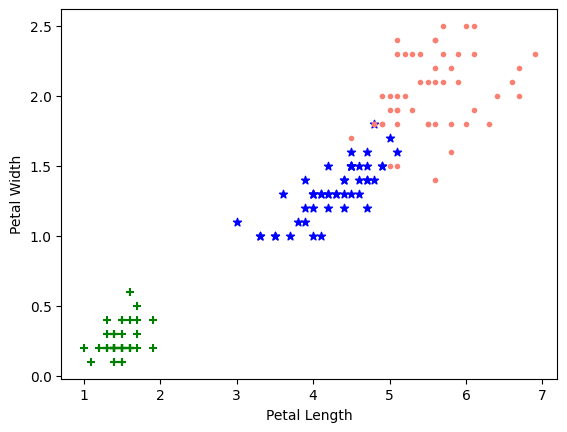

In [8]:
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='*')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='salmon', marker='.')
plt.show()

### Training The Model


#### Train Test Splitting and Normalization


In [9]:
from sklearn.model_selection import train_test_split

x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

#### Training KNN Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

def KNNx(a, x_train, y_train, x_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=a)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc = knn.score(x_test, y_test)
    return y_pred, acc

y_pred, accuracy = KNNx(5, x_train, y_train, x_test, y_test)
CM = confusion_matrix(y_test, y_pred)

accuracy

1.0

##### Plotting Confusion Matrix Heatmap

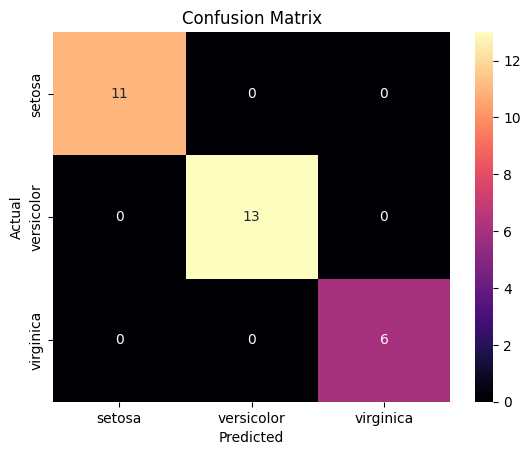

In [11]:
import seaborn as sns

plt.figure()
sns.heatmap(
    CM,
    annot=True,
    cmap = 'magma',
    xticklabels=iris.target_names,
    yticklabels=iris.target_names
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Abalone Dataset

Dataset talks about sea creature abalone.

We predict abalone age. Age = Number of Rings on shell + 1.5


In [45]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo


Import dataset from website

In [46]:
!pip install ucimlrepo

In [47]:
from ucimlrepo import fetch_ucirepo
abalone = fetch_ucirepo(id=1)

X = pd.DataFrame(abalone.data.features)
y = pd.DataFrame(abalone.data.targets.values.ravel()) # Convert y into an array.

data = pd.concat([X, y], axis=1)

display(X.describe(), y.describe(), data)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


,0
count,4177.000000
mean,9.933684
std,3.224169
min,1.000000
25%,8.000000
50%,9.000000
75%,11.000000
max,29.000000


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,0
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Visualize Features

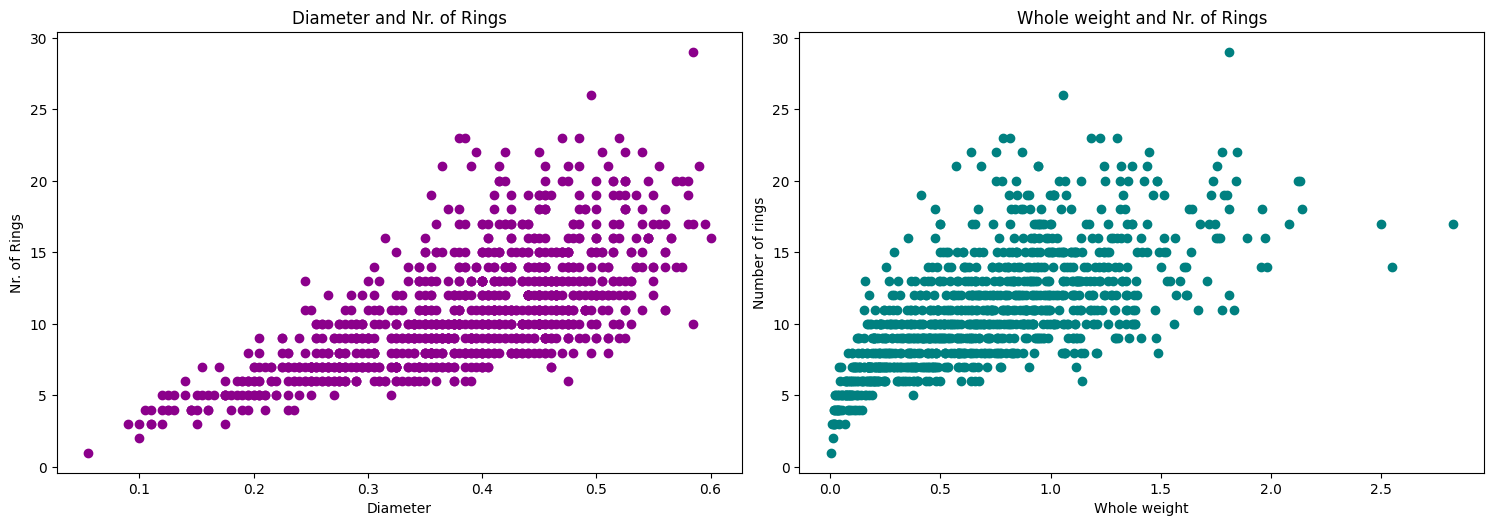

In [48]:
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout()

# Diameter and nr. of Rings
ax2.scatter(data["Diameter"][:1000], data[0][:1000], color="darkmagenta")
ax2.set(title="Diameter and Nr. of Rings",
       xlabel="Diameter",
       ylabel="Nr. of Rings")

# Whole weight and nr. of Rings
ax3.scatter(data["Whole_weight"][:1000], data[0][:1000], color="teal")
ax3.set(title="Whole weight and Nr. of Rings",
       xlabel="Whole weight",
       ylabel="Number of rings");

#### Train the model:

label encode categorical column

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])

Standardize Data

In [50]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train on sklearn

In [51]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=15, metric='manhattan', weights='distance') # Manhattan distance and 15 were estimated using k-flod cross validation
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

Check Predictions

In [52]:
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

R² Score: 0.5224
RMSE: 2.2737


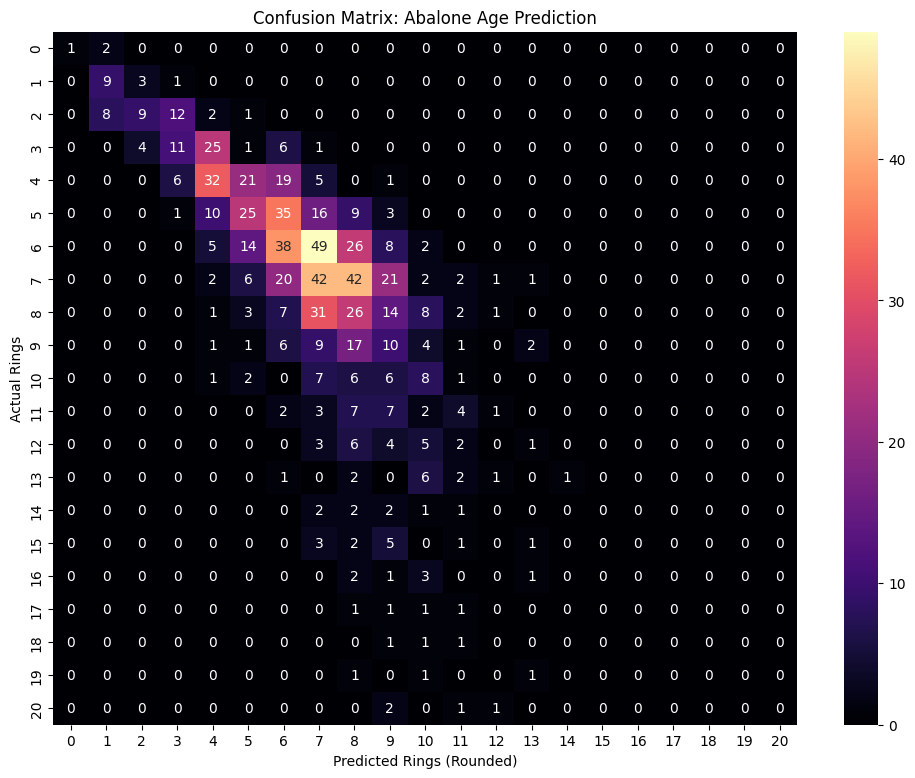

In [55]:
y_pred_rounded = np.rint(y_pred).astype(int)
y_test_rounded = y_test.astype(int)

cm = confusion_matrix(y_test_rounded, y_pred_rounded)

plt.figure(figsize=(12, 9))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma')
plt.title('Confusion Matrix: Abalone Age Prediction')
plt.xlabel('Predicted Rings (Rounded)')
plt.ylabel('Actual Rings')
plt.show()

The **Best** score achieved through K-NNs comes out to be around **52% to 54%** accuracy.

## Cancer Classification

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if 'id' in df.columns:
    df = df.drop(columns=['id'])

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

display(X.describe(),y.describe(), y.value_counts(), X.columns) # Target is Categorical

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


,diagnosis
count,569
unique,2
top,B
freq,357


,count
diagnosis,
B,357
M,212


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [76]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_scaled, y_train)
y_pred5 = knn5.predict(X_test_scaled)

print(f"Full Feature Accuracy (k=5): {accuracy_score(y_test, y_pred5):.2%}")

Full Feature Accuracy (k=5): 94.74%


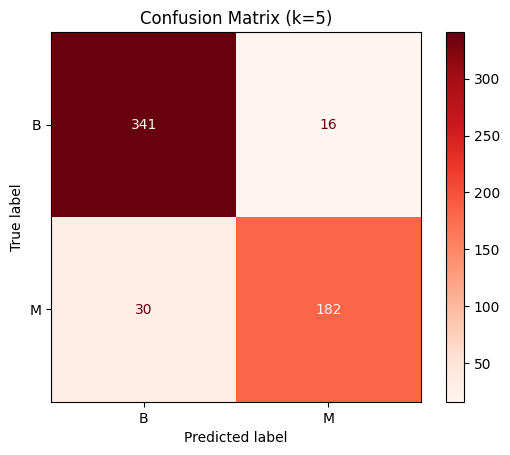

In [71]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Reds')
plt.title("Confusion Matrix (k=5)")
plt.show()